In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [32]:
df = pd.read_csv("Experiments/datasets/vehicles.zip")

df[["c1", "c2"]] /= 10**5

df = df.sort_values(by=["class", "tid", "t"])

df.head()

,tid,class,t,c1,c2
0,30901,B,0,42.077160,4.738411
1,30901,B,30,42.077246,4.739088
2,30901,B,60,42.077259,4.739096
3,30901,B,90,42.077369,4.739158
4,30901,B,120,42.077635,4.739343


In [65]:
from TCIF.algorithms.utils import prepare

n = 30
print(n/len(df[df["class"]=="T"].tid.unique()))

tid, classe, lat, lon, time = prepare(df, 
                                      df[df["class"]=="T"].tid.unique().tolist() + df[df["class"]=="B"].tid.unique().tolist()[:n], 
                                      verbose=False)

0.10989010989010989


In [66]:
np.unique(classe, return_counts=True)

(array(['B', 'T'], dtype='<U1'), array([ 30, 273]))

In [83]:
from TCIF.classes.T_CIF_observation import T_CIF_observations
from TCIF.classes.T_CIF_space import T_CIF_space
from TCIF.classes.T_CIF_time import T_CIF_time

X = [(_lat, _lon, _time) for _lat, _lon, _time in zip(lat, lon, time)]

tcif = T_CIF_observations(
    n_trees=100, 
    n_interval=50, 
    min_length=.05, 
    interval_type="percentage", 
    n_jobs=4, 
    verbose=True
)

X_transform = tcif.transform(X)

percentage, min:0.05, max:inf


  0%|          | 0/303 [00:00<?, ?it/s]

In [84]:
X_transform.shape

(303, 2900)

In [88]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=43).fit(X_transform)
clf.predict(X_transform)

array([-1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

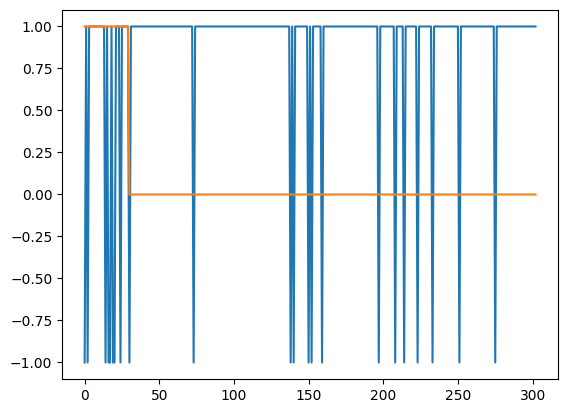

In [93]:
plt.plot(clf.predict(X_transform))
plt.plot([1  if c == 'B' else 0 for c in classe])

In [81]:
X_transform

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.93609005e-04, 5.22784909e+00, 2.07226181e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.25627535e-04, 2.36948713e+00, 1.47071502e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
u, c = np.unique(df.groupby("tid")["class"].max(), return_counts=True)

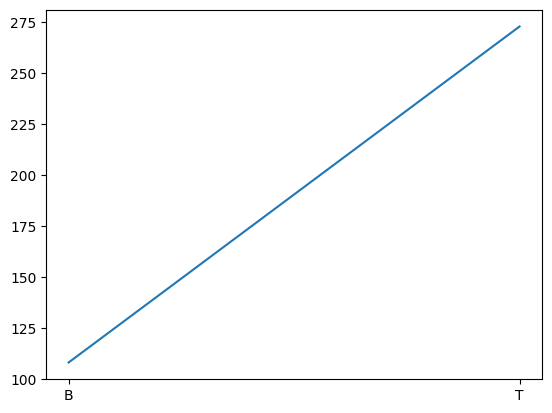

In [20]:
plt.plot(u, c)

In [15]:
df_t = df[df["class"] == "T"]

df_t.head()

,tid,class,t,c1,c2
61879,86201,T,0,4207588.1,486253.8
61880,86201,T,30,4207543.6,486261.6
61881,86201,T,60,4207562.6,486292.4
61882,86201,T,90,4207473.8,486289.6
61883,86201,T,120,4207270.7,486226.1
